<a href="https://colab.research.google.com/github/AgentWombat/Neural_Network_Introduction/blob/main/Nerual_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Neural Network?





From pathmind.com:

>"*Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.*






---


**But what does that mean?**

The above definition is describing NNs in a very abstract sense. It does not comment on how an NN is implemented. Re-worded, the definition might be "Neural networks map quantifications of inputs to useful quantifications of outputs."

An estute reader might think, "Wait just a minute. Is that not what a function does?" And the reader would be correct! An NN is just that: a function.


---


**Functions**

Let us say I want a program that will give me the successor to any natural number. A user will input a word, say "one", and recieve the word which is its successor, in this case "two". I could try and manually account for each case,

```
if input == "one":
  return "two"
else if input == "two":
  return "three"
else if...
```


but the inefficiency of this method is obvious with the set of natural numbers having no upper bound.

Instead, I should quantify my inputs, allowing me to utilize the mathematical structure behind the set of words-representing-natural-numbers. While I can not add words together, I can add the integer values of words together. I can use a helper function which takes an english expansion of a natural numbers and converts its related integer:


```
#function to quantify an english word
def quantify(word):
  some implementation of english rules
  ...

#example input
quantify("one-hundred-and-twenty-five") -> 125

#function to convert back an english word
def dequantify(word):
  some implementation of english rules
  ...

#example input
quantify(14) -> "fourteen"

```
From there, I can decipher the mathematical relationship between the quantification of an english word for a number and that of its successor.

To determine the pattern of numbers their successors I consider some examples: 1 -> 2, 5 -> 6, 13 -> 14... After some observation, I devise the following function successor(x) = x+1 to map a number to its successor.

Putting the pieces together, and for the purpose of creating a program to return the english word representing the successor of an english word representing a natural number, 


`output = dequantify(successor(quantify(input)))`.

The important thing is that mathematical functions, like my successor function, can not operate on objects, only on quantifications thereof.

Now, how does this relate to NNs?


---


**Neural Networks**

As said up front, NNs are just functions.  So, like functions, NNs require quantification of inputs and then dequantification of the NN's output to get back an intended output. What differentiates an NN from a function is the method by which the mapping is determined.

Going back to when I was trying to determine the mapping from a number to its successor, I used my mental faculties to observe examples I knew (1 -> 2, 5 -> 6, 13 -> 14...) to devise successor(x) = x + 1. But what if I wanted the computer to determine that for itself?

Just as I analysed examples to determine the mathematic structure of my data, so can a computer achieve this with *machine learning*.

>*A neural network is a function that was determined through the process of machine learning.*

Neural networks are, mathematically, the composition of functions (which is still just a function). Fine tuning these functions with machine learning can result in a desired result. A usefull conceptualisation of Nueral networks is as nodes on a graph (adding to the analogy of neurons in a biological structure).


![picture](https://drive.google.com/uc?id=1k3afuA-CzV41jSFHdz8PqnSoF2NGEqae)

Lets say the above structure represents the neural network that will determine the sucessor of a number. It has two nodes (circles) and one connection (the line between the nodes). The first node represents the input to the neural network. For our case, it will hold the value of a natural number 1,2,3,4... The output will be the successor to the input natural number. The connection is where the input will be mapped to the output using some math function.

It could also be drawn like this:

![picture](https://drive.google.com/uc?id=1C4mWPrc4U8rIYwlcTD8llizMuya-c8UB)

Because I already know how to get the successor of a number, I could set the mapping from the input node to the ouput node to f(x) = x + 1. This would lead to the neural network working as intended. The input starts in the input node, gets mapped to the ouput in the connection with the function f(x) = x + 1, and then is returned through the output node.

To use machine learning to determine this function f, I instead define a more general function. I can determine my general function by making an educated guess for the form of my final function. For my successor function, I presume it takes on an affine shape (i.e. f(x) = mx + b). After picking a general form, I initialize my parameters (m and b in this case) to some random values (or perhaps guesses at the correct values). 

Let m = 3 and b = 0 => f(x) = 3x + 0

Using this function in my NN leads to the following results:

![picture](https://drive.google.com/uc?id=1v545yBTmpjbzatVEWhXo92SZgagFPAxA)

My NN did not work very well. Aside from the first prediction, every prediction is above what it should be (and it is getting worse and worse). To quantify exactly how bad it performed, I can choose a method of computing the cost of my NN's state. The cost is a measurement of how bad an NN is at predicting what it is intended to predict. It could be calculated in an infinite number of ways. One example is adding up the absolute distances from each predicted point to its true, correct point. As long as the cost is higher for bad performance and lower for good performance, along with other requirements like being differentiable, it will work to some amount of success.

What machine learning will do is, given how the NN performed with certain parameters, is update the parameters such that, ideally, it will perform better next time. The way that parameters are updated changes based on what method is being used and what cost function is in place. It typically involves differentiation of the cost function with respect to each parameter. To learn more about how exactly this works, I reccomend [this video](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=358s&ab_channel=3Blue1Brown) after finishing this notebook. For now, let us simply assume that there exists a way of determining how to change the parameters such that the next trial of the neural network will likely have better results.

After my computer determines and sets these new parameter values for my NN, it tests itself again, repeating the process of updating parameters utill I tell it to stop. This process of iteratively updating the parameters based on already known data is called "fitting" a neural network to or "Training" a neural network on data.

Now, lets create and train this neural network to find a numbers successor ourself.

Terminology: Because a neural network *models* some phenomena, a neural network is often called a *model*.

# Creating a 'Successor' Neural Network



In [ ]:
# IMPORTS
# We will be using the Keras Tensorflow API to create and train a neural network.

# First, import the required libraries for creating our 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

# This import is only for making graphs to visualize our model.
from matplotlib import pyplot as plt

In [ ]:
# CREATE DATA
# In order for our NN to learn how to predict a number's sucessor, we need to
# provide some example pairs of numbers and their successors.

x = [i for i in range(1,10001)] # an array of numbers from 1 to 10000 (inclusive)
y = [i + 1 for i in x] # for each i in [1,10000], y[i] = x[i] + 1

In [ ]:
# CREATE MODEL'S GRAPH/ARCHITECTURE
# Remember that the model we are creating has two nodes: input and output.
# The two nodes are also aranged in a sequential fassion--one after the other.

# So, we start by making a "Sequential" model
model = Sequential()

# The model should have two nodes with one connection between the nodes.
# In other terms, our model will have two layers with one node per layer
# and all values in the first layer being passed into the all nodes in the second.

# The input of our model is one value, so it has the shape (1,) which means that
# it will take 1 dimensional vectors.
# Setting the shape to (k,) is the same as saying that the model will have k
# input nodes 
model.add(Input(shape = (1,)))

# To get the behavior we want, we use a Dense layer with one node.
# A Dense node uses an affine function (f(x) = mx + b) when recieving a value
# from another node (in this case our input)
# The argument 1 specifies how many nodes are in the layer.
model.add(Dense(1))

# Because this is our last layer, it will automatically be the output

# Lastly, we must compile the model to determine how it will learn.
# We will use "mean squared error" as a loss function (part of how cost
# is calculated) and the "adam" optimizer.
model.compile(loss='mse', optimizer='adam')

In [ ]:
# TRAIN OUR MODEL
# We will train our model based on the imput output pairs we created earlier.
# Epochs are a measure of how many times the model will consider each data pair.
# Epochs = 1 means our model will be "fit" to the data once.
model.fit(x,y, epochs = 1)

print(model.weights)

313/313 [==============================] - 1s 917us/step - loss: 78917201.7197
[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.319684]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.29861477], dtype=float32)>]


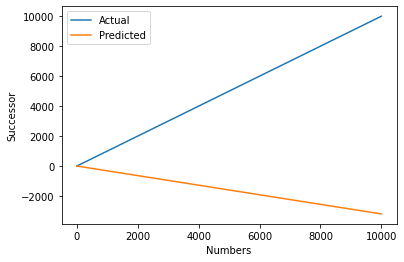

In [ ]:
# Graph model against real data to gauge its performance

plt.plot(x,y, label = 'Actual')
plt.plot(x,model.predict(x), label = 'Predicted')
plt.xlabel('Numbers')
plt.ylabel('Successor')
plt.legend()

plt.show()

In [ ]:
# TEST MODEL

# The model predict continuous values; however, we want integers.
print("Continuous values:\n", model.predict([1,2,3,4,5,6,7,8,9]))

print("\n\n\nIntegers:\n",[1,2,3,4,5,6,7,8,9])
#So, we round each prediction to its closest integer.
print("\nInteger Successors:\n",[round(i[0]) for i in (model.predict([1,2,3,4,5,6,7,8,9]))])

Continuous values:
 [[-0.02106923]
 [-0.34075323]
 [-0.6604372 ]
 [-0.98012125]
 [-1.2998053 ]
 [-1.6194892 ]
 [-1.9391732 ]
 [-2.2588573 ]
 [-2.5785413 ]]



Integers:
 [1, 2, 3, 4, 5, 6, 7, 8, 9]

Integer Successors:
 [0, 0, -1, -1, -1, -2, -2, -2, -3]


In [ ]:
# The model needs more training as it does not accurately predict a
# numbers successor

model.fit(x,y, epochs = 100)

print(model.weights)

# NOTE: Usually, a the number of epochs is much smaller than 100 (making it that
# high might actually hurt your models performance). Because we are fitting our
# model to an elementry math function and there is a large range of outputs,
# its behavior is atypical

Epoch 1/100
313/313 [==============================] - 0s 913us/step - loss: 46979880.0000
Epoch 2/100
313/313 [==============================] - 0s 871us/step - loss: 29206564.0000
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 17050720.0000
Epoch 4/100
313/313 [==============================] - 0s 895us/step - loss: 9218452.0000
Epoch 5/100
313/313 [==============================] - 0s 894us/step - loss: 4535898.0000
Epoch 6/100
313/313 [==============================] - 0s 874us/step - loss: 1985601.1250
Epoch 7/100
313/313 [==============================] - 0s 920us/step - loss: 755079.9375
Epoch 8/100
313/313 [==============================] - 0s 861us/step - loss: 242130.3281
Epoch 9/100
313/313 [==============================] - 0s 842us/step - loss: 63357.7539
Epoch 10/100
313/313 [==============================] - 0s 911us/step - loss: 13069.5156
Epoch 11/100
313/313 [==============================] - 0s 876us/step - loss: 2040.1610
Epoch 12/100
313

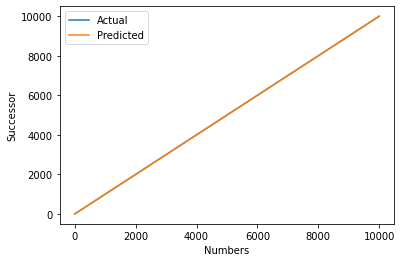

In [ ]:
# Graph model against real data to gauge its performance

plt.plot(x,y, label = 'Actual')
plt.plot(x,model.predict(x), label = 'Predicted')
plt.xlabel('Numbers')
plt.ylabel('Successor')
plt.legend()

plt.show()

In [ ]:
# TEST MODEL

# The model predict continuous values; however, we want integers.
print("Continuous values:\n", model.predict([1,2,3,4,5,6,7,8,9,100]))

print("\n\n\nIntegers:\n",[1,2,3,4,5,6,7,8,9,100])
#So, we round each prediction to its closest integer.
print("\nInteger Successors:\n",[round(i[0]) for i in (model.predict([1,2,3,4,5,6,7,8,9,100]))])

Continuous values:
 [[  2.0027087]
 [  3.0027082]
 [  4.002708 ]
 [  5.0027075]
 [  6.002707 ]
 [  7.0027065]
 [  8.002707 ]
 [  9.002706 ]
 [ 10.002706 ]
 [101.00267  ]]



Integers:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 100]

Integer Successors:
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 101]


In [ ]:
# That is all!
# We have trained a neural network to know what the successor to an integer is.

# A More Complex Model

The model we described and then created was very basic. Of course a computer can learn to approximate a simple algebraic function.

How about we train one to classify images?

---
**Classification**

>*Classification is where a neural network takes in some data, whatever it may be, and assigns it to a one or more classes.* 

An example might be a neural network in a self-driving car to regognize what is extant in front of a car. The car would take images and send them to the NN; the NN would then classify/label the images (e.g. NN(img) -> Person & Car & Tree).

Before we get into crafting a model, let us first advance our understanding of neural network architecture.

---

**A Second look at Neural Networks**

For our last model, the one to determind a number's successor, it had only two nodes and one connection between them. That was a very simple example. 

Typically, there will be more than one node in a layer.

![picture](https://drive.google.com/uc?id=1YggPrM5IQzee_YLMYp8098i2LS0Lk60E)

Before, the output was the result of the input * m + b. Now, the output is equal to the sum of the each input multiplied by an associated weight (w), all added to some bias (b). 

Lets say both weights equal 2 and the bias equals 10. If [3,5] was input to the neural network, I_0 becomes 3 and I_1 becomes 5. Consequently, the output equals 2 * 3 + 2 * 5 + 10 = 26.

The above NN can only learn linear functions. That means that each input will be mapped proportionately to an output.

To fix this problem, NNs almost alwas use non-linear activation functions.


![picture](https://drive.google.com/uc?id=1spKSSxw2VJ3NvL2ycW_XYD3kJt0D2W2O)

An activation function takes the value of a node and modifies it. One activation function could be a(x) = 1/x. Implementing an activation function to the input layer, this would make the ouput instead equal w_0 * a(I_0) + w_1 * a(I_1) + b. a(I_0) is called I_0's *activation*. Typically, activation nodes, the small ones in my diagram, are not drawn but instead assumed.

By adding more nodes and more layers, assuming a non-linear activation function is implemented, neural networks can approximate any math function.

All layers of a neural network aside from the input and output layers are labeled as hidden layers because a user of a trained model does not need to know anything about the hidden layers.

![picture](https://drive.google.com/uc?id=1OY438avjFrEXZGTPBfVOaNT5J7ah0Rdf)

All layers behave the same. The value of each node in the hidden layer is calculated the same way the output was calculated before. Each node in layer N + 1 is Σ(w_i*(a_i)) + b. Where a_i is the i-th activation of layer N (i.e. (a([N-th layer node]_i))).

---

**Classification**

I want to create a neural network to identify what number is contained in an image file like the one below.

![picture](https://drive.google.com/uc?id=1E3TMwJsOAX_1rH50eVfXNS8tsJ8SriVm)

The goal is that by training a neural network on a large number of pre-labeled examples, it can learn how to identify hand writen digits without the digits being labeled. This process is similar to how a child might learn the numeral of any given digit. A child is not indoctrinated with a mathematical formula for parsing image data such that he or she can see the numeral for '2' and then identify it as such; a child learns the numeral for '2' by seeing a large amount of examples and being told "this is a two."

For the learning process, I will feed an image to my model and then compare its guess to what the correct label is, chastising the model if it guesses wrong.

The first step is to quantify my input. Just as math can not directly be done on "one" and "two", neither can math be done on a PNG file without first quantifying. Because the images I will be using are 28x28 and in greyscale, meaning each pixel is defined by a brightness on [0-255], an image will be represented by a two dimensional array with dimensions 28x28 and each index holding a value between 0 and 255.

```
# 2D array with 28 rows and 28 columns
two = [[0,0, 0, 0... 0,0],
       [0,0,103,82.. 0,0],
       .................. 
       [0,12,57,0... 0,0],
       [0,0,103,82.. 0,0]]
```

For the models covered here, the input is always 1D array, so I will flatten it such that each pixel becomes an index in one big vector.


```
# 1D array with 28^2 = 784 indices
two = [0,0,0,0,0,0... 38,58,0... 242,0,0,0]
```

For purposes of imporving the models ability to train, inputs are typically normalized to all be withing the range of 0-1, -1 to 1, or some other small range. To do this for my data, I can simply divide each number by 255, leading to every value ranging between 0 and 1.

With the images now quantified, mathematic relationships can be detected through machine learning. The model might deduce that when pixel 90 is very bright, it is likely that '7' was drawn.

To have my model guess a number based on the input, I could have it oneput a single number. There are problems with this. There are only 10 valid guesses, [0, 9], and if the model where to guess a single number, it has an near infinite number of possible outputs. Additionaly, if the correct answer was '3' and the model guessed wrong, it would be punished more harshely for outputing '8' than '1'. This does not make sense as guessing a wrong number is no more correct if it is additively close. 

As an alternative, and what is almost always done is cases such as these, I will set my model to have ten output nodes, where each node represents a number on [0,9]. Whichever output node contains the largest value can be considered to be the model's guess.

Having ten output nodes means that the model expects to see vectors with 10 elements as example labels/outputs. Numbers will be encoded such that all values in a vector will be '0' except for the index corresponding to the number.This type is encoding is called *one hot encoding*.

```
# How 0 is encoded
[1,0,0,0,0,0,0,0,0,0]

# How 6 is encoded
[0,0,0,0,0,0,1,0,0,0]
```

For the model to gauge how well it guessed, it will compare its output to the correct output. For this model, it only really makes sinse for it to have values between 0 and 1 in its output. To ensure it has this, I will use an activation function called "softmax" which not only ensures all outputs are between 0 and 1, but also that all outputs add up to 1. All outputs adding to one has the added benefit that each number in the ouput vector can be interpreted as a probability (all probabilities should add to be 1).

```
# An image with '1' drawn on it is input

# What the model predicts
[0.1,0.2,0,0,0.3,0.1,0.1,0,0.1,0.1]

# What the correct output is
[0,1,0,0,0,0,0,0,0,0]

# The the machine learning process compares the two vectors

[0.1,0.2,0,0,0.3,0.1,0.1,0,0.1,0.1]
[0,1,0,0,0,0,0,0,0,0]

# It sees that indices 0,4,5,6,8,9 should have been lower and
# index 1 should have been higher.
# Through backpropagation, parameters are changed such that the model should
# guess better next time
```

After my model has learned from thousands of examples, I can evaluate how accurately it labels numbers. I might be tempted to evaluate by seeing how well it labels images from the data on which I trained the model, but that would be cheating. The goal of creating a neural network is not to correctly identify the data on which I trained it, but for the NN to correctly identify never-before-seen images. When evaluating the model on the data which trained it, the model could have simple "memorized" the specific examples (in the event that this occurs, the model is said to have *overfit* to the data).

So, to evaluate my model, I test in on a data set it has never seen before.

That is the basics of classification. Let us now code the very classification model I have described above.


# Creating a Classification Neural Network

In [ ]:
# IMPORTS
# We will be using the Keras Tensorflow API to create and train a neural network.

# First, import the required libraries for creating our 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist

# For easier handling of arrays, import numpy
import numpy as np

# This import is only for displaying graphics
from matplotlib import pyplot as plt

In [ ]:
# LOAD DATA
# Load mnist data set. It contains 60,000 training and 10,000 testing examples
# of labeled hand drawn digits represented in 28*28 arrays.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to all be in the range of 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0

# We will later flatten the data to be a 1D arrray.

In [ ]:
# ONE HOT ENCODE
# Define function to one hot encode labels
def to_one_hot(array):
  new_array = np.zeros(shape = (array.shape[0], 10))

  for i, num in enumerate(array):
    one_hot_vector = np.zeros(10)
    one_hot_vector[num] = 1
    new_array[i] = one_hot_vector

  return new_array

# One hot encode labels
# 1 -> [0,1,0,0,0,0,0,0,0,0], 4 -> [0,0,0,0,1,0,0,0,0,0]
y_train = to_one_hot(y_train)

y_test = to_one_hot(y_test)

In [ ]:
# See first training example and its label 
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [ ]:
# DEFINE MODEL ARCHITECTURE
# Just as in the previous neural network, a sequential model will suffice for 
# our purposes
model = Sequential()

# The first layer is the input layer
# Remember, we will be feedint the model flattened 28x28 arras, which are
# 1D 28^2 = 784 element arrays.
# Hence, we need 784 input nodes.
model.add(Input(shape = (784,)))

# Now we define our hidden layers.
# There is no obviously 'correct' number of nodes per layer or even
# number of layers to use.
# I arbitrarily chose two hidden layers with 16 nodes in each
# For the activation function, we need to use something non-linear.
# The state-of-the-art default choice for an activation function is
# rectified linear (or 'relu')
# Sidenote: relu(x) = max(0,x)
# 'sigmoid' or 'tanh' are other common options

# When passing the activation argument into a layer, think of it as
# creating an "activation layer" between the current layer and the next

model.add(Dense(16, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

# To classify an image, we will create 10 output nodes with a 'softmax'
# activation function.
# The softmax activation function ensures that all outputs will be on [0,1]
# and that the ouputs sum to 1

model.add(Dense(10, activation='softmax'))

# Now we compile the model to define how it learns by setting a loss function
# and optimizer
# For classification problems, we want to use 'categorical_crossentropy'
# It is used as a loss function when there are more than two classes being
# predicted.

# 'metrics' defines what metrics are displayed while training and what metrics
# will be stored in the even that someone wishes to analise the models history
model.compile(loss='categorical_crossentropy', optimizer ='adam',
              metrics =['accuracy'])


In [ ]:
# TRAIN MODEL
# We pass in our training data.
# x_train currently has the shape (60000, 28,28), but we want to each example
# to be flat so we reshape it to be (60000, 784).

# 'batch_size' determines how many examples the model considers before updating
# its parameters.
# There are costs and benifits to both larger and smaller batch sizes.

# Remember, the model considers the whole dataset 'epochs' number of times.

model.fit(x_train.reshape(60000, 784), y_train, batch_size = 32, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7301 - accuracy: 0.7834
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2606 - accuracy: 0.9245
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2193 - accuracy: 0.9372


In [ ]:
# To see how well the model predicts on a new data set, we evaluate
# on the testing set of data

model.evaluate(x_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 975us/step - loss: 0.1982 - accuracy: 0.9434


[0.19818450510501862, 0.9434000253677368]

Predicted: [[6.46694243e-05 4.80261224e-05 5.79977524e-04 1.07200474e-04
  1.76927529e-03 9.65427935e-01 3.07909083e-02 9.57631642e-07
  1.17762678e-03 3.33895987e-05]] 
 But that is kind of hard to read...



Predicted: 5 
 The numpy array function ".argmax()" returns the index with the highest value


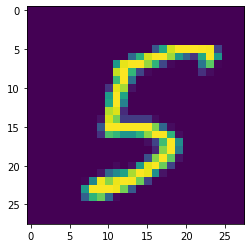

In [ ]:
# LET'S OBSERVE THE MODEL OURSELF
# Change the value of 'INDEX' to check differnt example
# Values between 0 and 9999 will work
INDEX = 23


print('Predicted:', model.predict(x_test[INDEX:INDEX+1].reshape((-1,784))), '\n But that is kind of hard to read...')

print('\n\n\nPredicted:', model.predict(x_test[INDEX:INDEX+1].reshape((-1,784))).argmax(), '\n The numpy array function ".argmax()" returns the index with the highest value')

plt.imshow(x_test[INDEX])

Notebook and its contained images created by Joshua Zingale